In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
yt_data = pd.read_csv("../data/USvideos_cc50.csv")
yt_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [61]:
#Buscamos el tipo de variables del dataset
yt_data.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
dtype: object

In [62]:
#Cantidad de filas en yt_data
print(len(yt_data))

40949


In [63]:
#Dataset sin data duplicada
yt_data_u = yt_data.drop_duplicates()
print(len(yt_data_u))

40948


In [64]:
#Ambos codigos nos muestran que no hay ningun valor NULL o ""
yt_data_u[yt_data_u == "NULL"].sum(skipna=True)
yt_data_u[yt_data_u == ""].sum(skipna=True)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id               0.0
publish_time                0
tags                        0
views                     0.0
likes                     0.0
dislikes                  0.0
comment_count             0.0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description                 0
state                       0
lat                       0.0
lon                       0.0
geometry                    0
dtype: object

In [65]:
#Buscamos los datos que sean NaN
yt_data_u.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64

In [66]:
#Encontramos que la descripcion presenta 570 entradas faltantes
#Al ser texto y no presentar informacion relevante para la investigacion,
#decidimos eliminarla
yt_data_u.drop(columns=["description"], inplace=True, axis = 1)

c:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
#Verificar que todos los id sean de 11 caracteres
for i in yt_data_u["video_id"]:
    if(len(i)!=11):
        print("Error")
#No hay ningun error en video_id

In [68]:
#Trabajar con las variables trending_date y publish_time como fechas y no como tipo objeto
yt_data_u["trending_date"] = pd.to_datetime(yt_data_u["trending_date"], format="%y.%d.%m")
yt_data_u["publish_time"] = pd.to_datetime(yt_data_u["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")


C:\Users\Usuario\AppData\Local\Temp/ipykernel_16000/2347764089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_data_u["trending_date"] = pd.to_datetime(yt_data_u["trending_date"], format="%y.%d.%m")
C:\Users\Usuario\AppData\Local\Temp/ipykernel_16000/2347764089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_data_u["publish_time"] = pd.to_datetime(yt_data_u["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")


In [69]:
#Creating a dataset to read the category types
categories = pd.read_json("../data/US_category_id.json")
categories["items"].to_json("../data/categories.json")
items = pd.read_json("../data/categories.json",orient="index")
items["snippet"].to_json("../data/items.json")
snippet = pd.read_json("../data/items.json",orient='index')
df2 = pd.DataFrame()
df2["id"] = items["id"]
df2["title"] = snippet["title"]
df2

,id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [70]:
#Creando una columna para el nombre de la categoría
yt_data_u["category_name"] = yt_data_u["category_id"].map(df2.set_index("id")["title"])
yt_data_u["category_name"]

C:\Users\Usuario\AppData\Local\Temp/ipykernel_16000/1051008242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_data_u["category_name"] = yt_data_u["category_id"].map(df2.set_index("id")["title"])


0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40948, dtype: object

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


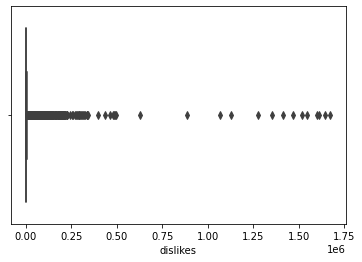

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comment_count'>

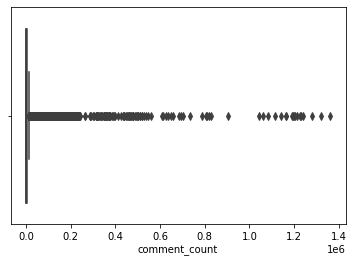

In [71]:
#Buscando outliers
sns.boxplot(yt_data_u["dislikes"])
plt.show()
sns.boxplot(yt_data_u["comment_count"])

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


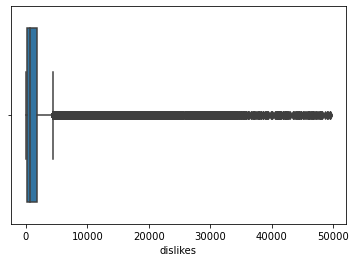

c:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comment_count'>

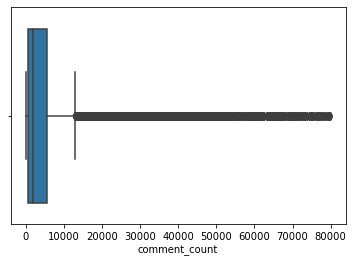

In [72]:
#Tanto en las columnas de "dislikes" y "comment_count" se han eliminado los outliers. Esto debido a que son objeto de estudio.
yt_data_u = yt_data_u[yt_data_u["dislikes"] <= 50000]
sns.boxplot(yt_data_u["dislikes"])
plt.show()
yt_data_u = yt_data_u[yt_data_u["comment_count"] <= 80000]
sns.boxplot(yt_data_u["comment_count"])

In [82]:
#Revisar el dataset final
print(len(yt_data_u))
print((len(yt_data)-len(yt_data_u))/len(yt_data)*100,'% borrados')
yt_data_u.head()

40305
1.5726879777283937 % borrados


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922),People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019),Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Delaware,39.000000,-75.500000,POINT (-75.5 39),Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Delaware,39.000000,-75.500000,POINT (-75.5 39),Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205),Entertainment


In [74]:
#Guardar el dataset en un csv
yt_data_u.to_csv("../data/yt_data.csv", index=False)